In [40]:
from analyze_bpe import get_piece_lengths, find_overlap, dataset, tokenizer
from tape_pytorch.models.task_models import EmbedModel
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from tsnecuda import TSNE

matplotlib.style.use('default')
%matplotlib notebook

In [5]:
frequencies = np.zeros((8000, 3))

for item, indices, _ in tqdm(dataset):
    ss3 = item['ss3']
    piece_lengths = get_piece_lengths(indices)
    for piece, idx in zip(piece_lengths, indices):
        this_piece = ss3[:piece]
        ss3 = ss3[piece:]
        for i in range(3):
            frequencies[idx, i] += np.sum(this_piece == i)

In [7]:
model = EmbedModel.from_pretrained('../pretrained_models/transformer_mlm_pretrain/pytorch_model_5/')

In [10]:
x = model.base_model.embeddings.word_embeddings.weight.data.numpy()[:8000]
y = TSNE(verbose=1).fit_transform(x)

<IPython.core.display.Javascript object>


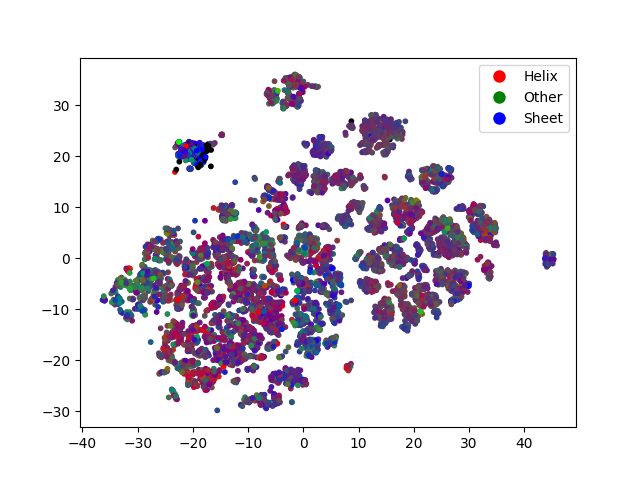

In [39]:
colors = frequencies / (np.sum(frequencies, 1, keepdims=True) + 1e-10)
fig, ax = plt.subplots()
markersize = 10
alpha = 1
scatter = ax.scatter(y[:, 0], y[:, 1], c=colors, s=markersize, alpha=alpha)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Helix',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Other',
                          markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Sheet',
                          markerfacecolor='b', markersize=10)]

ax.legend(handles=legend_elements)
plt.show()

<IPython.core.display.Javascript object>


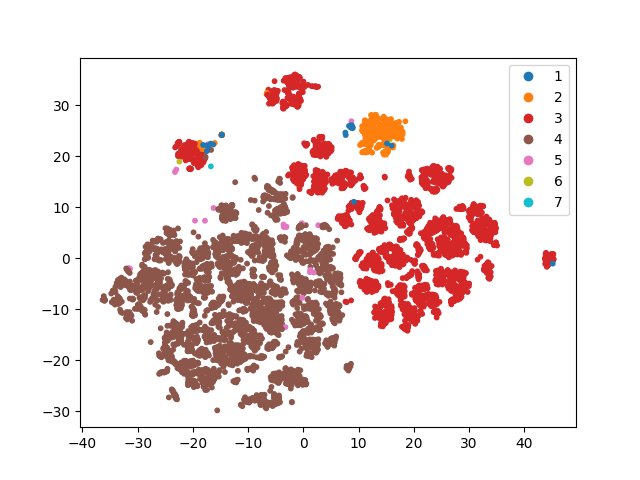

In [38]:
lengths = [len(tokenizer.convert_id_to_token(i)) for i in range(8000)]
fig, ax = plt.subplots()
markersize = 10
alpha = 1
scatter = ax.scatter(y[:, 0], y[:, 1], c=lengths, s=markersize, alpha=alpha, cmap='tab10')
ax.legend(*scatter.legend_elements())
plt.show()

<IPython.core.display.Javascript object>


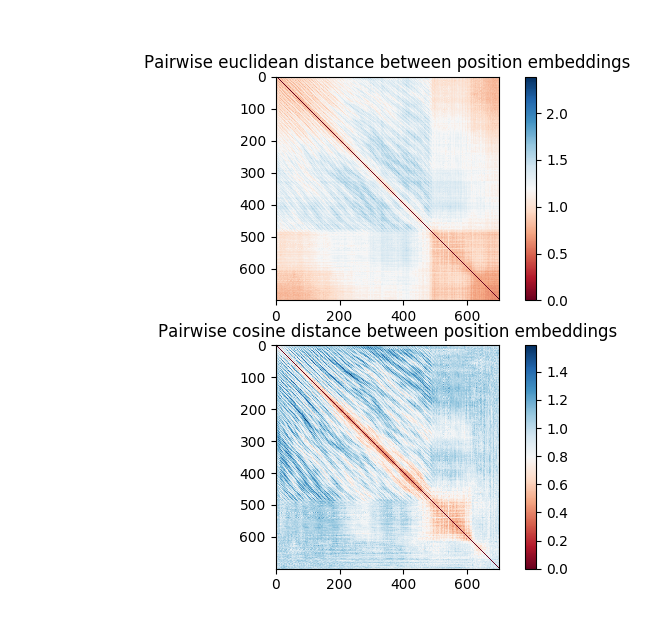

In [45]:
pos = model.base_model.embeddings.position_embeddings.weight.data.numpy()[:700]
dist_euclid = squareform(pdist(pos))
dist_cosine = squareform(pdist(pos, 'cosine'))
fig, (ax_euclid, ax_cosine) = plt.subplots(nrows=2)

im_euclid = ax_euclid.imshow(dist_euclid, cmap='RdBu')
ax_euclid.set_title('Pairwise euclidean distance between position embeddings')
fig.colorbar(im_euclid, ax=ax_euclid)
im_cosine = ax_cosine.imshow(dist_cosine, cmap='RdBu')
ax_cosine.set_title('Pairwise cosine distance between position embeddings')
fig.colorbar(im_cosine, ax=ax_cosine)
plt.show()